In [ ]:
import ROOT as R
import matplotlib.pyplot as plt

In [2]:
eos_path = "/eos/cms/store/group/phys_higgs/vbfhiggs/NanoV12/Muon0/Run2023C-22Sep2023_v1-v1_NanoV12/240128_155207/0000/"
ifile = R.TFile(f"{eos_path}/nano_data_2023_CD_NANO_97.root")
itree = ifile.Get("Events")

Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [3]:
branches = itree.GetListOfBranches()
for branch in branches:
    print(branch.GetName())

run
luminosityBlock
event
bunchCrossing
BeamSpot_type
BeamSpot_sigmaZ
BeamSpot_sigmaZError
BeamSpot_z
BeamSpot_zError
nboostedTau
boostedTau_idAntiEle2018
boostedTau_idAntiMu
boostedTau_idMVAnewDM2017v2
boostedTau_idMVAoldDM2017v2
boostedTau_jetIdx
boostedTau_rawAntiEleCat2018
boostedTau_charge
boostedTau_decayMode
boostedTau_chargedIso
boostedTau_eta
boostedTau_leadTkDeltaEta
boostedTau_leadTkDeltaPhi
boostedTau_leadTkPtOverTauPt
boostedTau_mass
boostedTau_neutralIso
boostedTau_phi
boostedTau_photonsOutsideSignalCone
boostedTau_pt
boostedTau_puCorr
boostedTau_rawAntiEle2018
boostedTau_rawIso
boostedTau_rawIsodR03
boostedTau_rawMVAnewDM2017v2
boostedTau_rawMVAoldDM2017v2
CaloMET_phi
CaloMET_pt
CaloMET_sumEt
ChsMET_phi
ChsMET_pt
ChsMET_sumEt
nCorrT1METJet
CorrT1METJet_area
CorrT1METJet_eta
CorrT1METJet_muonSubtrFactor
CorrT1METJet_phi
CorrT1METJet_rawPt
nPFCands
PFCands_trkHighPurity
PFCands_charge
PFCands_fromPV
PFCands_isIsoChHad
PFCands_lostInnerHits
PFCands_lostOuterHits
PFCands_num

In [4]:
nEvents = itree.GetEntries()

In [5]:
values = []

for ev in range(nEvents):
    itree.GetEntry(ev)

    hlt = itree.HLT_IsoMu24
    if not hlt:
        continue
        
    nMuons = itree.nMuon
    muId = itree.Muon_tightId
    muIso = itree.Muon_pfIsoId
    muPt = itree.Muon_pt
    muEta = itree.Muon_eta
    muPhi = itree.Muon_phi
    muMass = itree.Muon_mass
    muons = []
    for mu in range(nMuons):
        if (muId[mu] > 0) and (muPt[mu] > 30) and (muIso[mu] >= 4):
            muon = R.TLorentzVector()
            muon.SetPtEtaPhiM(muPt[mu], muEta[mu], muPhi[mu], muMass[mu])
            muons.append(muon)

    if len(muons) != 2:
        continue

    mass_mm = (muons[0] + muons[1]).M()
    values.append(mass_mm)

In [6]:
print (values)

[99.54695031073284, 88.38396259567854, 91.93626327221929, 98.23828098095743, 35.19944436297878, 93.00269539762337, 82.1446370729711, 92.04614998402863, 90.15123702590098, 90.6043941998713, 89.9199827195093, 88.41816636406186, 88.361094359057, 88.0351155419821, 90.93251945060629, 94.47345313427884, 86.9214184861038, 65.16330108205511, 90.34014578912192, 91.3218412964825, 90.3827062859263, 92.3808806355522, 89.80073981788077, 91.38613008112989, 90.58098164128637, 93.89770288473798, 90.37397664949388, 95.5686432698128, 100.66514697423679, 88.816566071406, 88.08023457521176, 92.64062630352835, 88.52292064851541, 91.8958679032576, 87.7353963995607, 89.54990381936105, 94.86790909187303, 91.51000659013286, 92.75122914093292, 82.73425275685382, 90.40865721490562, 89.11853034900254, 95.11206739768777, 94.44434394497793, 89.3256433913469, 91.44752780612497, 89.65995832484624, 87.35581744044889, 88.74766342975092, 88.9546809501467, 94.45943320148237, 92.18257775995356, 91.62415615068456, 89.27972

(array([  0.,   2.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   1.,
          0.,   0.,   2.,   2.,   1.,   2.,   1.,   1.,   3.,   2.,   3.,
          3.,   3.,   5.,   7.,  11.,  15.,   6.,  10.,  19.,  31.,  41.,
         75., 111., 167., 147., 106.,  63.,  44.,  25.,  17.,   8.,   4.,
          3.,   5.,   3.,   5.,   2.,   4.,   1.,   3.,   1.,   4.,   1.,
          0.,   0.,   2.,   0.,   2.,   0.,   1.,   2.,   0.,   1.,   0.,
          2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   1.,   0., 

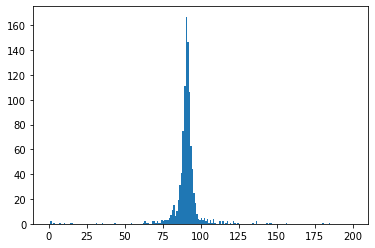

In [8]:
plt.hist(values, range=(0, 200), bins=200)